In [1]:
import os, sys, glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## Write prospect theory model

In [4]:
# We want to transform an objective value X into a subjective utility U
def prospect_utility(x, lam, rho):
    if x >= 0:
        u = x**rho
    elif x < 0:
        u = -lam*(-x)**rho
    return u

## Simulate one parameter setting

In [43]:
lam = 2
rho = .8

In [44]:
xs = np.arange(-10, 11, .1)
us = np.array([prospect_utility(x, lam, rho) for x in xs])

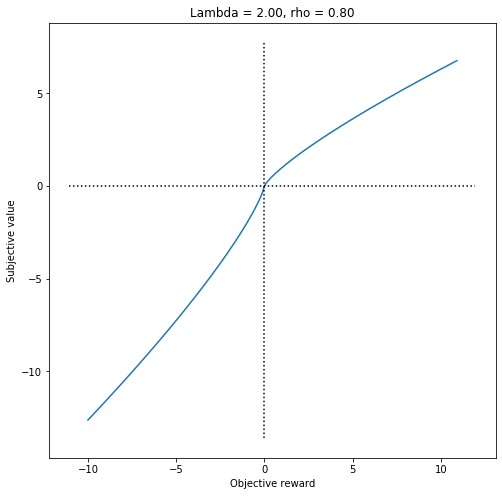

In [46]:
fig, axes = plt.subplots(1,1,figsize=[8,8]);
axes.plot(xs, us);
axes.plot([0,0], axes.get_ylim(), 'k:');
axes.plot(axes.get_xlim(), [0,0], 'k:');
axes.set(xlabel = 'Objective reward', ylabel = 'Subjective value', title = 'Lambda = %.2f, rho = %.2f'%(lam,rho));

## Simulate a bunch of parameter values

In [47]:
lambdas = [1,2,3]
rhos = [0.5,1,1.5]

In [48]:
all_us = pd.DataFrame()
for lam in lambdas:
    for rho in rhos:
        for x in xs:
            u = prospect_utility(x, lam, rho)
            all_us = all_us.append(pd.DataFrame([[lam,rho,x,u]],columns = ['lambda','rho','x','u']))
all_us = all_us.reset_index(drop=True)

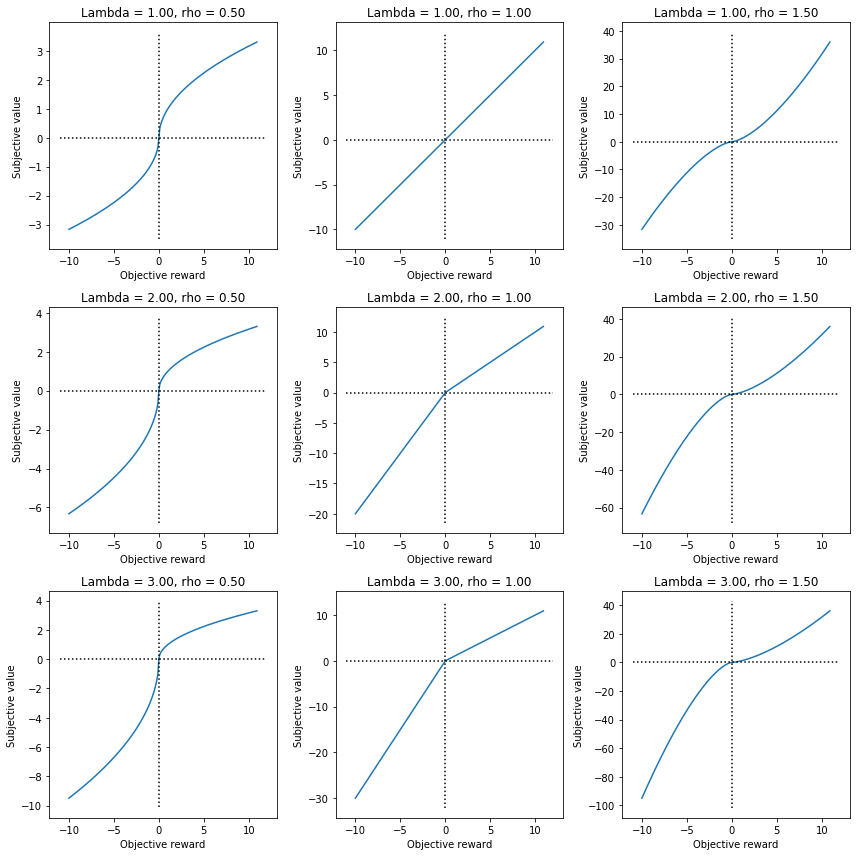

In [61]:
nrows = len(lambdas)
ncols = len(rhos)
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize = [nrows*4,ncols*4])
for li,lam in enumerate(lambdas):
    for ri,rho in enumerate(rhos):
        sim_dat = all_us.loc[(all_us['lambda']==lam) & (all_us['rho']==rho),['x','u']]
        xs = sim_dat['x']
        us = sim_dat['u']
        ax = axes[li,ri]
        ax.plot(xs, us);
        ax.plot([0,0], ax.get_ylim(), 'k:');
        ax.plot(ax.get_xlim(), [0,0], 'k:');
        ax.set(xlabel = 'Objective reward', ylabel = 'Subjective value',
               title = 'Lambda = %.2f, rho = %.2f'%(lam,rho));
plt.tight_layout()

## Let's do some gambles and fit the curve